In [25]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_csv('./datafiles/heart_failure_clinical_records_dataset.csv')
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
175,60.0,1,95,0,60,0,337000.0,1.0,138,1,1,146,0
240,70.0,0,81,1,35,1,533000.0,1.3,139,0,0,212,0
166,53.0,0,196,0,60,0,220000.0,0.7,133,1,1,134,0
235,77.0,1,109,0,50,1,406000.0,1.1,137,1,0,209,0
25,80.0,0,148,1,38,0,149000.0,1.9,144,1,1,23,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
X = df.drop(columns=['DEATH_EVENT'])
Y = df['DEATH_EVENT']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [44]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred = logistic_model.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7888888888888889

In [45]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        61
           1       0.66      0.72      0.69        29

    accuracy                           0.79        90
   macro avg       0.76      0.77      0.76        90
weighted avg       0.80      0.79      0.79        90



In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[50, 11],
       [ 8, 21]])

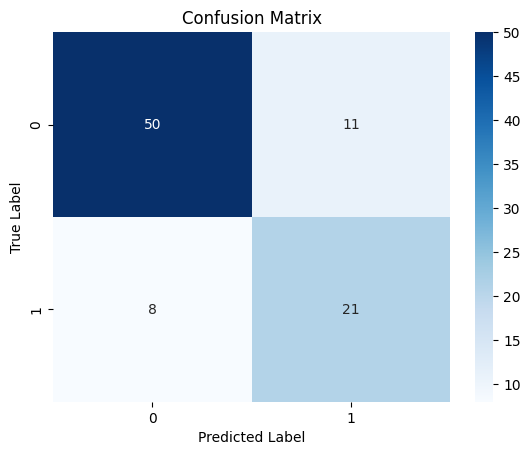

In [50]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
new_input_df = df.loc[:0].drop(columns=['DEATH_EVENT'])

predicted_class = logistic_model.predict(new_input_df)

predicted_class

array([1])